In [136]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import klib  
import plotly.express as px
import missingno as msno
import matplotlib.pyplot as plt

In [126]:
df = pd.read_excel('Call_Volume_Trend_Analysis_Project_9.xlsx')

In [127]:
df.head()

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,2022-01-01 09:02:38,9,9_10,00:01:36,96,answered,Agent,YES,00:00:16
1,Executives 4,1000004.0,80595XXXXX,0,2022-01-01 09:02:40,9,9_10,00:02:20,140,answered,Agent,YES,00:00:26
2,Executives 65,1000065.0,70202XXXXX,0,2022-01-01 09:02:49,9,9_10,00:01:25,85,answered,AutoWrapped,YES,00:00:16
3,Executives 55,1000055.0,96104XXXXX,1,2022-01-01 09:02:51,9,9_10,00:01:31,91,answered,Agent,YES,00:00:25
4,Executives 21,1000021.0,82001XXXXX,0,2022-01-01 09:02:55,9,9_10,00:02:45,165,answered,Agent,YES,00:00:23


In [128]:
df.shape

(117988, 13)

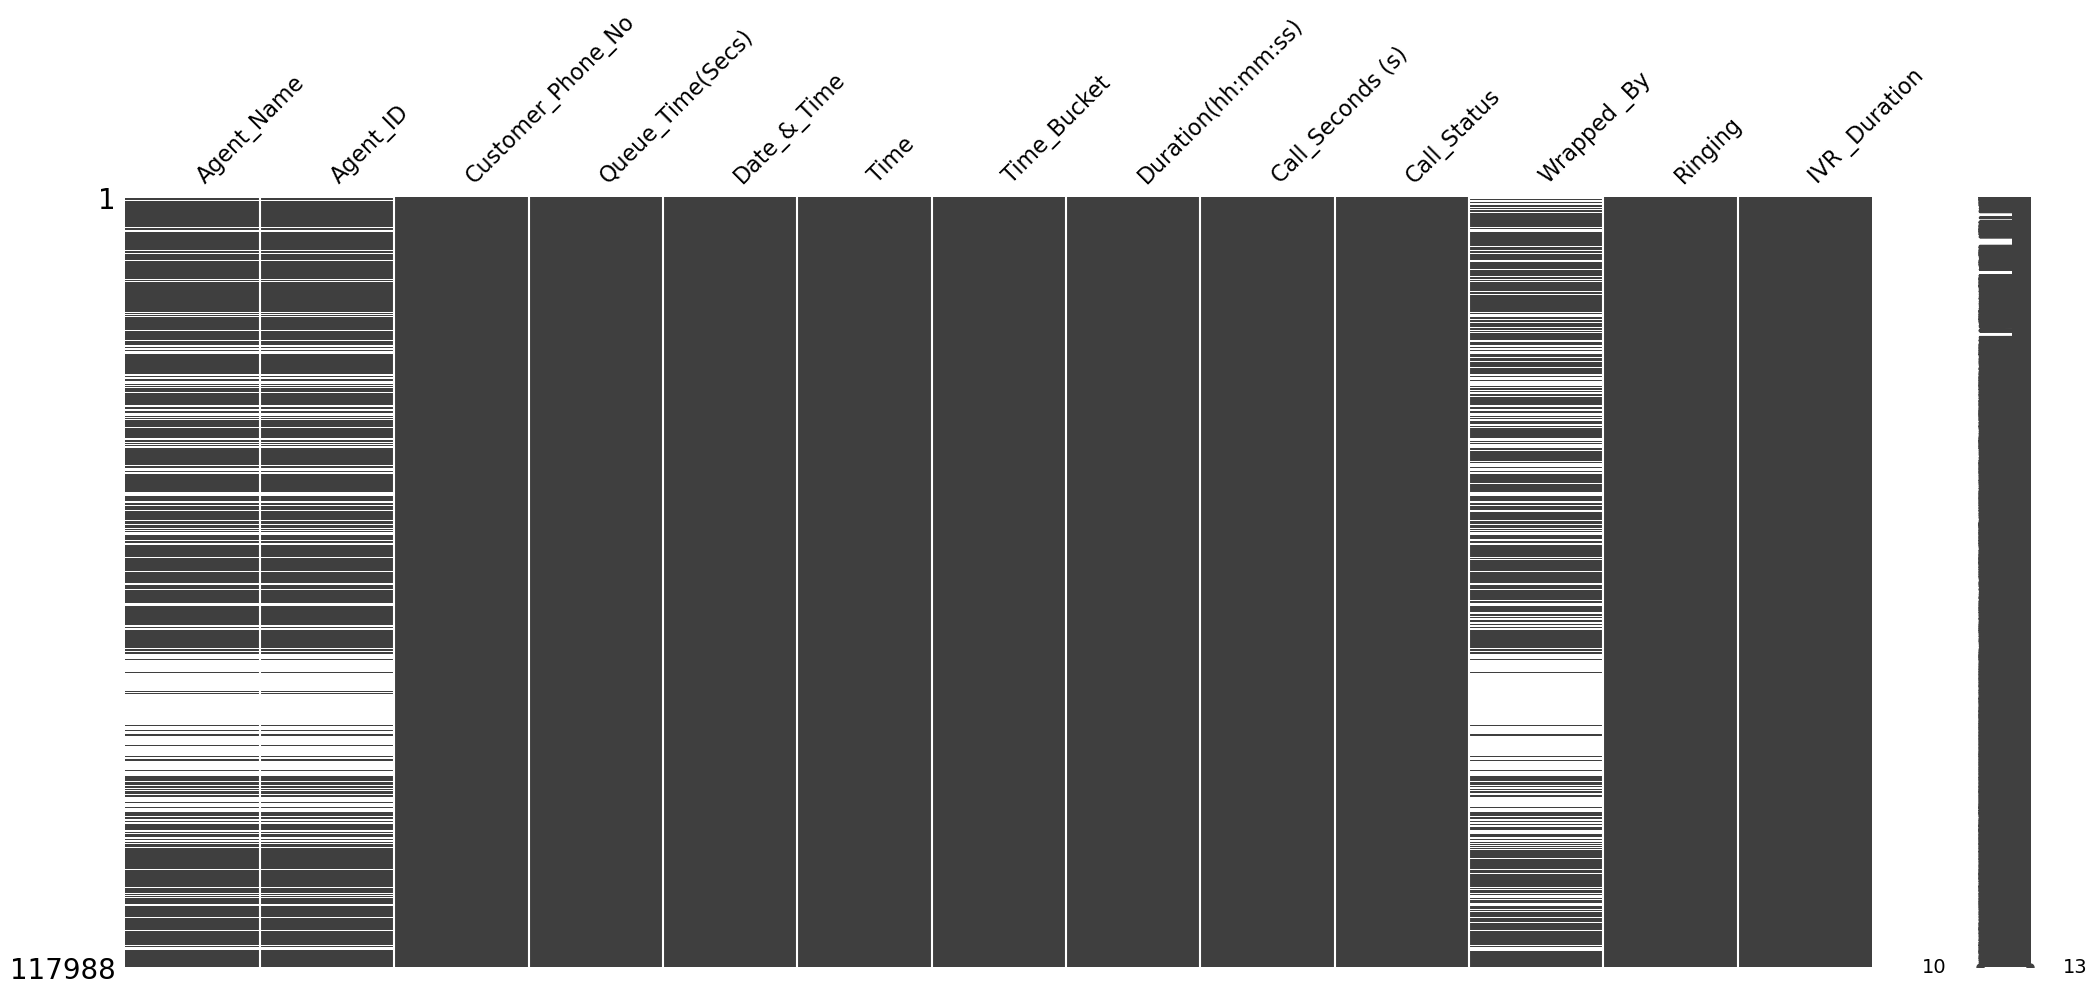

In [137]:
msno.matrix(df)
plt.show()

In [129]:
df.isnull().sum()

Agent_Name            34198
Agent_ID              34198
Customer_Phone_No         0
Queue_Time(Secs)          0
Date_&_Time               0
Time                      0
Time_Bucket               0
Duration(hh:mm:ss)        0
Call_Seconds (s)          0
Call_Status               0
Wrapped _By           47877
Ringing                   0
IVR _Duration             0
dtype: int64

In [138]:
df['Agent_Name'].fillna('Abandon', inplace=True)
df['Agent_ID'].fillna(0000000, inplace=True)
df['Wrapped _By'].fillna('Abandon', inplace=True)

In [139]:
df.isnull().sum()

Agent_Name            0
Agent_ID              0
Customer_Phone_No     0
Queue_Time(Secs)      0
Date_&_Time           0
Time                  0
Time_Bucket           0
Duration(hh:mm:ss)    0
Call_Seconds (s)      0
Call_Status           0
Wrapped _By           0
Ringing               0
IVR _Duration         0
dtype: int64

In [59]:
df.shape

(117988, 13)

In [60]:
df[df.duplicated()]

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration


In [61]:
df.dtypes

Agent_Name                    object
Agent_ID                     float64
Customer_Phone_No             object
Queue_Time(Secs)               int64
Date_&_Time           datetime64[ns]
Time                           int64
Time_Bucket                   object
Duration(hh:mm:ss)            object
Call_Seconds (s)               int64
Call_Status                   object
Wrapped _By                   object
Ringing                       object
IVR _Duration                 object
dtype: object

In [62]:
cat_col = [x for x in df.columns if df[x].dtypes == 'object']
num_col = [x for x in df.columns if x not in cat_col]

In [63]:
print(f"categorical columns : {cat_col}\nnumerical columns : {num_col}")

categorical columns : ['Agent_Name', 'Customer_Phone_No', 'Time_Bucket', 'Duration(hh:mm:ss)', 'Call_Status', 'Wrapped _By', 'Ringing', 'IVR _Duration']
numerical columns : ['Agent_ID', 'Queue_Time(Secs)', 'Date_&_Time', 'Time', 'Call_Seconds (s)']


# Average Call Duration
 
Determine the average duration of all incoming calls received by agents. This should be calculated for each time bucket.
Your Task: What is the average duration of calls for each time bucket?

In [140]:
incoming_calls = df[df['Call_Status'] == 'answered']

# Separate incoming calls handled by agents and AutoWrapped
incoming_calls_agent = incoming_calls[incoming_calls['Wrapped _By'] == 'Agent']
incoming_calls_autowrapped = incoming_calls[incoming_calls['Wrapped _By'] == 'AutoWrapped']
incoming_calls_abandon = incoming_calls[incoming_calls['Wrapped _By'] == 'Abandon']

average_duration_per_bucket_agent = incoming_calls_agent.groupby('Time_Bucket')['Call_Seconds (s)'].mean().reset_index()
average_duration_per_bucket_autowrapped = incoming_calls_autowrapped.groupby('Time_Bucket')['Call_Seconds (s)'].mean().reset_index()

average_duration_per_bucket_agent_sorted = average_duration_per_bucket_agent.sort_values(by='Time_Bucket')
average_duration_per_bucket_autowrapped_sorted = average_duration_per_bucket_autowrapped.sort_values(by='Time_Bucket')

fig = px.line(average_duration_per_bucket_agent_sorted, x='Time_Bucket', y='Call_Seconds (s)', 
              title='Average Call Duration per Time Bucket',
              labels={'Time_Bucket': 'Time Bucket', 'Call_Seconds (s)': 'Average Call Duration (seconds)'})

fig.add_scatter(x=average_duration_per_bucket_autowrapped_sorted['Time_Bucket'], 
                y=average_duration_per_bucket_autowrapped_sorted['Call_Seconds (s)'], 
                mode='lines', name='AutoWrapped')
fig.update_layout(width=800, height=600)

fig.show()

print(f"average_duration_per_bucket : {average_duration_per_bucket_agent_sorted} \n average duration per bucket autowrapped sorted : {average_duration_per_bucket_autowrapped_sorted}")
average_duration_per_bucket_agent_sorted.to_excel('average_duration_per_bucket.xlsx')
average_duration_per_bucket_autowrapped_sorted.to_excel('average_duration_per_bucket_autowrapped.xlsx')

average_duration_per_bucket :    Time_Bucket  Call_Seconds (s)
0        10_11        210.324603
1        11_12        204.176585
2        12_13        192.923099
3        13_14        195.270722
4        14_15        195.320329
5        15_16        198.887306
6        16_17        199.375059
7        17_18        201.392840
8        18_19        204.094177
9        19_20        205.420539
10       20_21        203.026026
11        9_10        199.452081 
 average duration per bucket autowrapped sorted :    Time_Bucket  Call_Seconds (s)
0        10_11        183.439216
1        11_12        176.139016
2        12_13        177.528263
3        13_14        178.012987
4        14_15        174.005995
5        15_16        196.904297
6        16_17        196.060000
7        17_18        177.029630
8        18_19        193.110448
9        19_20        192.472441
10       20_21        190.699029
11        9_10        187.539238


# Call Volume Analysis
Visualize the total number of calls received. This should be represented as a graph or chart showing the number of calls against time. Time should be represented in buckets (e.g., 1-2, 2-3, etc.).
Your Task: Can you create a chart or graph that shows the number of calls received in each time bucket?

In [141]:
call_count_per_bucket= df.groupby('Time_Bucket').size().reset_index(name='Call_Count')
call_count_per_bucket_sort = call_count_per_bucket.sort_values(by= 'Time_Bucket')
fig = px.bar(call_count_per_bucket_sort, x='Time_Bucket', y='Call_Count', 
             title='Number of Calls Received in Each Time Bucket',
             labels={'Time_Bucket': 'Time Bucket', 'Call_Count': 'Number of Calls'})



# Show the plot
fig.show()
call_count_per_bucket_status = df.groupby(['Time_Bucket', 'Call_Status']).size().reset_index(name='Call_Count')

# Create grouped bar chart using Plotly Express
fig = px.bar(call_count_per_bucket_status, x='Time_Bucket', y='Call_Count', color='Call_Status',
             title='Number of Calls Received in Each Time Bucket by Call Status',
             labels={'Time_Bucket': 'Time Bucket', 'Call_Count': 'Number of Calls', 'Call_Status': 'Call Status'},
             barmode='group')

# Show the plot
fig.show()
call_count_per_bucket_status.to_excel('call_count_per_bucket_status.xlsx')

# Manpower Planning
The current rate of abandoned calls is approximately 30%. Propose a plan for manpower allocation during each time bucket (from 9 am to 9 pm) to reduce the abandon rate to 10%. In other words, you need to calculate the minimum number of agents required in each time bucket to ensure that at least 90 out of 100 calls are answered.
Your Task: What is the minimum number of agents required in each time bucket to reduce the abandon rate to 10%?

# Agents Required

To get overall percentage of 10 % of abandon calls we need can use the following method now. 

Abandon_call_Percentage_Per_Bucket  = n amount Total_agent_per_bucket
10_percent_abandon_call_in_each_bucket = (n / abandon_call_percentage_per_bucket) * 10

In [143]:
# Filter out abandon calls
abandon_calls_df = df[df['Call_Status'] == 'abandon']

# Group by 'Time_Bucket' and count the total number of abandon calls in each bucket
abandon_call_per_bucket = abandon_calls_df.groupby('Time_Bucket').size().reset_index(name='Total_abandon_calls')

# Group by 'Time_Bucket' and count the total number of calls and agents in each bucket
call_count_per_bucket = df.groupby('Time_Bucket').agg({'Agent_Name': 'nunique', 'Call_Status': 'count'}).reset_index()
call_count_per_bucket = call_count_per_bucket.rename(columns={'Agent_Name': 'Total_agent_per_bucket', 'Call_Status': 'Total_calls_per_bucket'})

# Merge the two DataFrames
merged_df = pd.merge(call_count_per_bucket, abandon_call_per_bucket, on='Time_Bucket', how='left')

# Calculate the abandon call percentage per bucket
merged_df['abandon_call_percentage_per_bucket'] = round(100 * (merged_df['Total_abandon_calls'] / merged_df['Total_calls_per_bucket']), 0)

# Calculate the number of agents required to achieve a 10% abandon rate in each bucket
merged_df['agent_require_for_10_percent'] = round(merged_df['Total_agent_per_bucket'] * (merged_df['abandon_call_percentage_per_bucket'] /10),0)
print(f'\nMean percentage of the abandon calls: {round(merged_df["abandon_call_percentage_per_bucket"].mean(), 0)}')

merged_df.to_excel('agent_require_to_10_abandon.xlsx')

merged_df


Mean percentage of the abandon calls: 28.0


,Time_Bucket,Total_agent_per_bucket,Total_calls_per_bucket,Total_abandon_calls,abandon_call_percentage_per_bucket,agent_require_for_10_percent
0,10_11,51,13313,6911,52.0,265.0
1,11_12,59,14626,6028,41.0,242.0
2,12_13,60,12652,3073,24.0,144.0
3,13_14,58,11561,2617,23.0,133.0
4,14_15,60,10561,2475,23.0,138.0
5,15_16,58,9159,1214,13.0,75.0
6,16_17,58,8788,747,9.0,52.0
7,17_18,58,8534,783,9.0,52.0
8,18_19,59,7238,933,13.0,77.0
9,19_20,52,6463,1848,29.0,151.0


In [145]:
import plotly.graph_objects as go

# Define the data
x_values = merged_df['Time_Bucket']
y_values_available_agents = merged_df['abandon_call_percentage_per_bucket']
y_values_agents_for_10 = merged_df['agent_require_for_10_percent']

# Create the figure
fig = go.Figure()

# Add line trace for available agents with data labels
fig.add_trace(go.Scatter(x=x_values, y=y_values_available_agents, mode='lines+markers', name='Available Agents',
                         text=y_values_available_agents, textposition='top center'))

# Add line trace for required agents with data labels
fig.add_trace(go.Scatter(x=x_values, y=y_values_agents_for_10, mode='lines+markers', name='Required Agents',
                         text=y_values_agents_for_10, textposition='top center'))

# Update layout
fig.update_layout(
    title='Manpower Planning Available Agents Vs Required Agents',
    xaxis_title='Time Bucket',
    yaxis_title='Count',
    legend_title='Metrics',
    legend=dict(orientation='h', yanchor='top', y=1.15, xanchor='right', x=1),  # Adjust legend position
)

# Show the plot
fig.show()


In [144]:
import plotly.graph_objects as go

# Define the data
x_values = merged_df['Time_Bucket']
y_values_total_calls = merged_df['Total_calls_per_bucket']
y_values_total_abandon_calls = merged_df['Total_abandon_calls']

# Create the figure
fig = go.Figure()

# Add scatter trace for total calls
fig.add_trace(go.Scatter(x=x_values, y=y_values_total_calls, mode='lines+markers', name='Total Calls',
                         text=y_values_total_calls, textposition='top center'))

# Add scatter trace for total abandon calls
fig.add_trace(go.Scatter(x=x_values, y=y_values_total_abandon_calls, mode='lines+markers', name='Abandon Calls',
                         text=y_values_total_abandon_calls, textposition='top center'))

# Update layout
fig.update_layout(
    title='Manpower Planning Total Calls vs Abandon Calls',
    xaxis_title='Time Bucket',
    yaxis_title='Count',
    legend_title='Metrics',
    legend=dict(orientation='h', yanchor='top', y=1.15, xanchor='right', x=1),  # Adjust legend position
)

# Show the plot
fig.show()


In [120]:
import plotly.graph_objects as go

# Define the data
x_values = merged_df['Time_Bucket']
y_abandon_call_percentage_per_bucket = merged_df['abandon_call_percentage_per_bucket']
y_values_agents_for_10 = merged_df['agent_require_for_10_percent']
y_values_total_calls = merged_df['Total_calls_per_bucket']
y_values_total_abandon_calls = merged_df['Total_abandon_calls']

# Create the figure
fig = go.Figure()

# Add bar trace for available agents with data labels
fig.add_trace(go.Bar(x=x_values, y=y_values_available_agents, name='Available Agents',
                         text=y_values_available_agents, textposition='outside'))

# Add bar trace for required agents with data labels
fig.add_trace(go.Bar(x=x_values, y=y_values_agents_for_10, name='Required Agents',
                         text=y_values_agents_for_10, textposition='outside'))



# Update layout
fig.update_layout(
    title='Manpower Planning Avaialble Agents vs Required Agents Bar Graph',
    xaxis_title='Time Bucket',
    yaxis_title='Count',
    legend_title='Metrics',
    legend=dict(orientation='h', yanchor='top', y=1.15, xanchor='right', x=1),  # Adjust legend position
)


# Show the plot
fig.show()


# Night Shift Manpower Planning 

Customers also call ABC Insurance Company at night but don't get an answer because there are no agents available. This creates a poor customer experience. Assume that for every 100 calls that customers make between 9 am and 9 pm, they also make 30 calls at night between 9 pm and 9 am. The distribution of these 30 calls is as follows:
Your Task: Propose a manpower plan for each time bucket throughout the day, keeping the maximum abandon rate at 10%

In [254]:
df.head(3)

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,2022-01-01 09:02:38,9,9_10,00:01:36,96,answered,Agent,YES,00:00:16
1,Executives 4,1000004.0,80595XXXXX,0,2022-01-01 09:02:40,9,9_10,00:02:20,140,answered,Agent,YES,00:00:26
2,Executives 65,1000065.0,70202XXXXX,0,2022-01-01 09:02:49,9,9_10,00:01:25,85,answered,AutoWrapped,YES,00:00:16


In [185]:
import pandas as pd

total_working_days_per_week = 6
unplanned_leaves_per_month = 4
total_working_hours = 9
break_time = 1.5
call_handling_percentage = 0.6  # 60%
total_days_in_month = 30

# Calculate total calls during the day and at night
total_calls_day = 100
total_calls_night = 30

# Group by day
monthly_grouped = df.groupby(pd.Grouper(key='Date_&_Time', freq='D'))

# Aggregate total calls, total agents, and other metrics per month
monthly_summary = monthly_grouped.agg({
    'Call_Status': 'count',
    'Agent_Name': 'nunique',
    'Call_Seconds (s)' : 'mean'
}).reset_index()

# Rename columns
monthly_summary = monthly_summary.rename(columns={'Call_Status': 'total_calls_a_day', 'Agent_Name': 'Number_of_employees_working','Call_Seconds (s)' : 'Average_duration'})
monthly_summary['total_calls_at_night'] =round( monthly_summary['total_calls_a_day']*0.3)
monthly_summary['Calls_to_answer_for_10%_abandon_rate_at_night'] = round(monthly_summary['total_calls_at_night']*0.90) 
monthly_summary['total_hours_needed'] = monthly_summary['Average_duration'] * monthly_summary['Calls_to_answer_for_10%_abandon_rate_at_night'] / 3600
available_hours_per_agent = 0.6 * (9 - 1.5)  # 60% of (total working hours - lunch time)

# Calculate the number of agents needed to handle the calls
monthly_summary['number_of_agents_needed'] = round(monthly_summary['total_hours_needed'] / available_hours_per_agent)

# Print the updated DataFrame
monthly_summary.to_excel('night_manpower.xlsx')

monthly_summary


,Date_&_Time,total_calls_a_day,Number_of_employees_working,Average_duration,total_calls_at_night,Calls_to_answer_for_10%_abandon_rate_at_night,total_hours_needed,number_of_agents_needed
0,2022-01-01,4644,35,145.707149,1393.0,1254.0,50.754657,11.0
1,2022-01-02,3351,35,171.293047,1005.0,904.0,43.013587,10.0
2,2022-01-03,4789,44,169.735435,1437.0,1293.0,60.963311,14.0
3,2022-01-04,5113,48,168.579308,1534.0,1381.0,64.668896,14.0
4,2022-01-05,4790,50,176.784551,1437.0,1293.0,63.495118,14.0
5,2022-01-06,4951,45,167.449000,1485.0,1336.0,62.142185,14.0
6,2022-01-07,4948,40,152.994947,1484.0,1336.0,56.778125,13.0
7,2022-01-08,4672,39,157.415240,1402.0,1262.0,55.182787,12.0
8,2022-01-09,3652,30,148.178258,1096.0,986.0,40.584379,9.0
9,2022-01-10,4983,42,156.279149,1495.0,1346.0,58.431037,13.0
